<tifffile.TiffPages @8> invalid page offset 20840448


(2866, 2944)


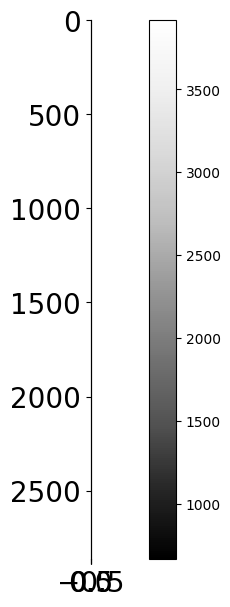

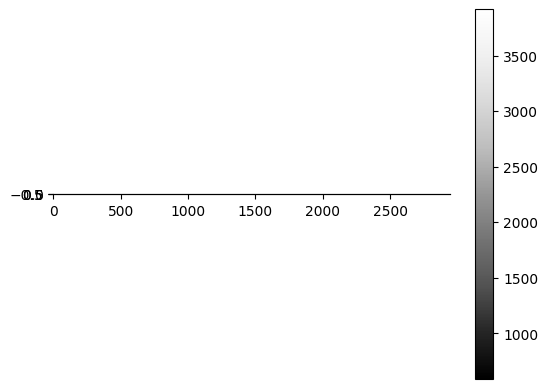

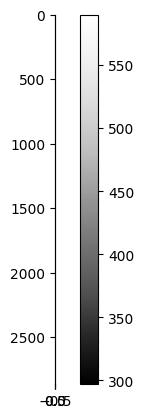

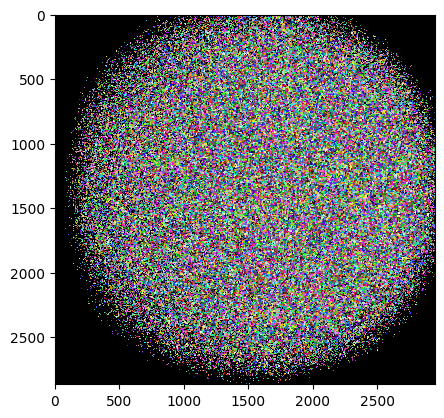

UnboundLocalError: local variable 'df' referenced before assignment

In [7]:
import numpy as np
from skimage.io import imread, imsave
from pyclesperanto_prototype import imshow
import pyclesperanto_prototype as cle
import pandas as pd
import matplotlib.pyplot as plt


!pip install pyclesperanto-prototype 

def main():
    image = imread("C:/Users/evgen/Downloads/s_1_1102_c.tif")
    print(image.shape)
    plt.figure(figsize=(15,7))
    plt.imshow(image,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    imshow(cle.maximum_x_projection(image), colorbar=True)
    imshow(cle.maximum_y_projection(image), colorbar=True)
    imshow(cle.maximum_z_projection(image), colorbar=True)
    
    # Segment objects
    label_image = cle.voronoi_otsu_labeling(image)
    imshow(label_image, labels=True)
    
    # determine center of mass for each object
    try:
        stats = cle.statistics_of_labelled_pixels(image, label_image)
        df = pd.DataFrame(stats)
        df[["mass_center_x", "mass_center_y", "mass_center_z"]]
    except:
        pass

    # configure size of future PSF image
    psf_radius = 20
    size = psf_radius * 2 + 1

    # initialize PSF
    single_psf_image = cle.create([size, size, size])
    avg_psf_image = cle.create([size, size, size])

    num_psfs = len(df)
    for index, row in df.iterrows():
        x = row["mass_center_x"]
        y = row["mass_center_y"]
        z = row["mass_center_z"]
    
        print("Bead", index, "at position", x, y, z)
    
        # move PSF in right position in a smaller image
        cle.translate(image, single_psf_image, 
                  translate_x= -x + psf_radius,
                  translate_y= -y + psf_radius,
                  translate_z= -z + psf_radius)

        # visualize
        fig, axs = plt.subplots(1,3)    
        imshow(cle.maximum_x_projection(single_psf_image), plot=axs[0])
        imshow(cle.maximum_y_projection(single_psf_image), plot=axs[1])
        imshow(cle.maximum_z_projection(single_psf_image), plot=axs[2])
    
        # average
        avg_psf_image = avg_psf_image + single_psf_image / num_psfs
        
        
    fig, axs = plt.subplots(1,3)    
    imshow(cle.maximum_x_projection(avg_psf_image), plot=axs[0])
    imshow(cle.maximum_y_projection(avg_psf_image), plot=axs[1])
    imshow(cle.maximum_z_projection(avg_psf_image), plot=axs[2])
    
    print(avg_psf_image.min(), avg_psf_image.max())
    
    
    normalized_psf = avg_psf_image / np.sum(avg_psf_image)

    imshow(normalized_psf, colorbar=True)
    print(normalized_psf.min(), normalized_psf.max())

        
    
    plt.show()
    
    
        
    
    
if __name__ == "__main__":
    main()
    